<a href="https://colab.research.google.com/github/GraceJulius/FDSFE_GJulius/blob/main/Class%20Demo/clustering_building_km_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
url = "https://www1.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_2017_consumption_data.xlsx"
df = pd.read_excel(url,"Information and Metrics")

In [3]:
df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34350,34682,6682473,Mitchell Hill- 2802 Clarendon Road,NaN,NaN,3.051940e+09,3-05194-0001,3119966,2802 Clarendon Road,NaN,...,NaN,NaT,187.1,160.2,26.8,295851.5,9019.86,Not found,2019-03-07,Not found
34351,34683,6682474,Mitchell Hill- 1116 Carroll Street,NaN,NaN,3.012880e+09,3-01288-0038,3033818,1116 Carroll Street,NaN,...,NaN,NaT,181.2,157.7,23.5,283262.5,8756.18,Not found,2019-03-07,Not found
34352,34684,6682477,Mitchell Hill- 3033 Brighton 13 Street,NaN,NaN,3.087160e+09,3-08716-0085,3245653,3033 Brighton 13 Street,NaN,...,NaN,NaT,230.4,177.0,53.3,451795.0,13366.71,Not found,2019-03-07,Not found
34353,34685,2819133,The Ritz Tower - 465 Park Avenue,NaN,NaN,1.013128e+09,1-01312-7502,1036922,465 Park Avenue,NaN,...,NaN,NaT,614.8,23.7,591.1,7118.2,27.04,Not found,2019-03-08,Not found


In [4]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2 (self-reported)', 'Postal Code', 'Street Number',
       'Street Name', 'Borough', 'DOF Gross Floor Area (ft²)',
       'Self-Reported Gross Floor Area (ft²)',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'ENERGY STAR Score', 'Source EUI (kBtu/ft²)',


In [5]:
features = df[["Year Built", "Electricity Use - Grid Purchase (kBtu)"]]
features

,Year Built,Electricity Use - Grid Purchase (kBtu)
0,1909,6551394.1
1,1963,616343.7
2,1999,8033914.4
3,1994,1976691.9
4,2012,1022951.6
...,...,...
34350,1931,316524.4
34351,1925,277672.0
34352,1926,629677.8
34353,1910,6979300.9


In [6]:
initial_shape = features.shape
initial_shape

(34355, 2)

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              34355 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 536.9 KB


<Axes: >

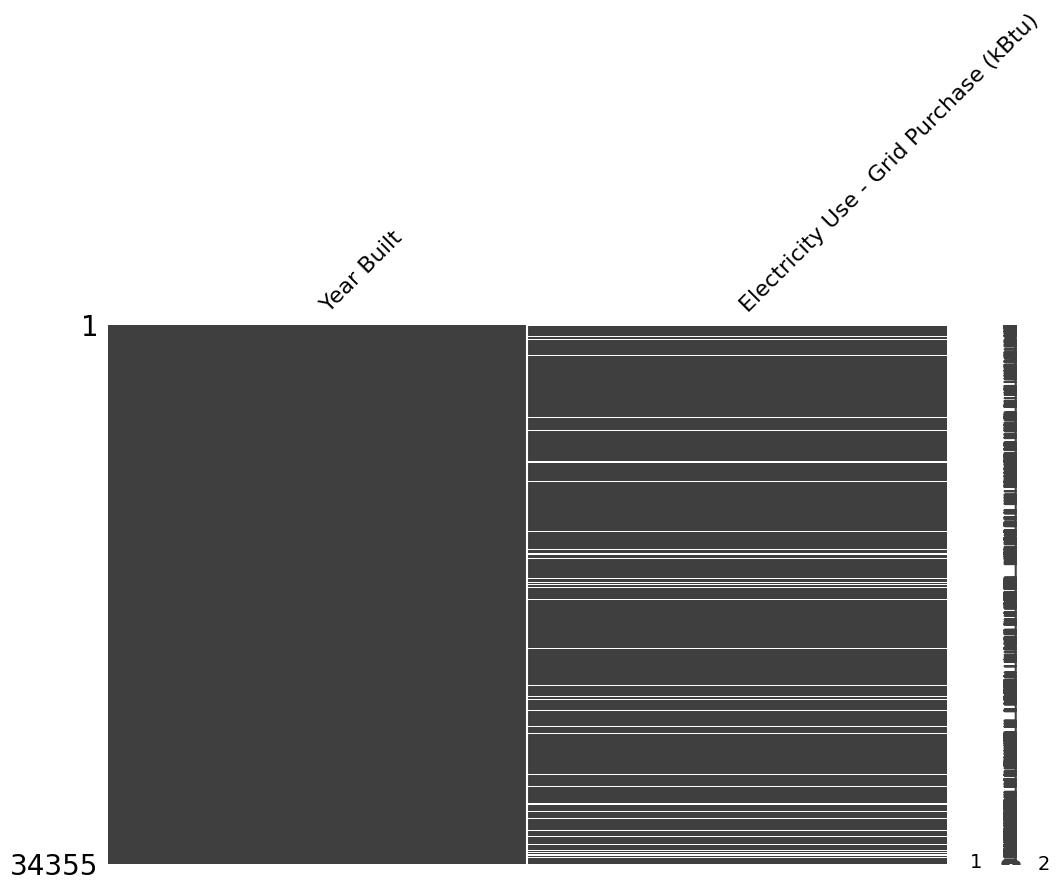

In [8]:
msno.matrix(features,figsize=(12,7))

In [9]:
features.dropna(inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31576 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              31576 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 740.1 KB


<ipython-input-9-97be9f7e6bb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


In [10]:
features.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,31576.000000,3.157600e+04
mean,1945.994141,3.833599e+06
std,32.791648,1.249719e+07
min,1051.000000,-6.343300e+03
25%,1924.000000,6.888429e+05
50%,1935.000000,1.249026e+06
75%,1964.000000,2.828563e+06
max,2021.000000,5.742834e+08


In [11]:
features = features[features["Year Built"] > 1900]
features = features[features["Electricity Use - Grid Purchase (kBtu)"] > 0]


In [12]:
features.shape

(30256, 2)

array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

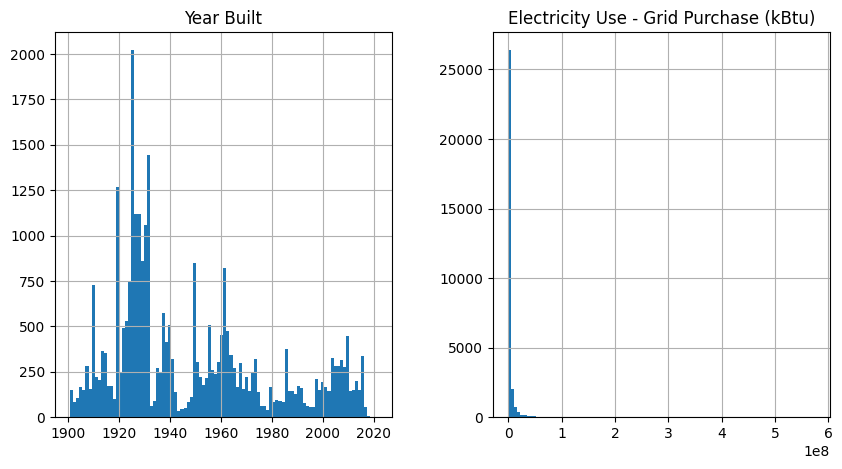

In [13]:
features.hist(figsize = (10,5), bins =100)

In [14]:
year_col = "Year Built"
elec_col = "Electricity Use - Grid Purchase (kBtu)"
features[elec_col] = np.log(features[elec_col])


array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

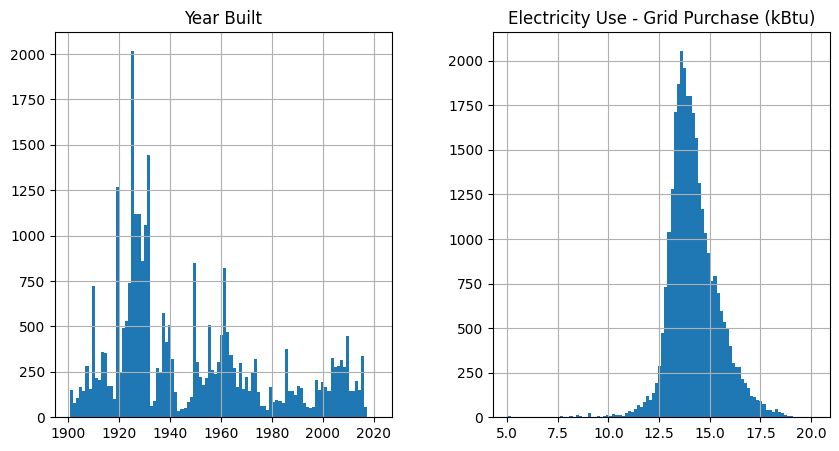

In [15]:
features.hist(figsize = (10,5), bins =100)

<Axes: xlabel='Year Built', ylabel='Electricity Use - Grid Purchase (kBtu)'>

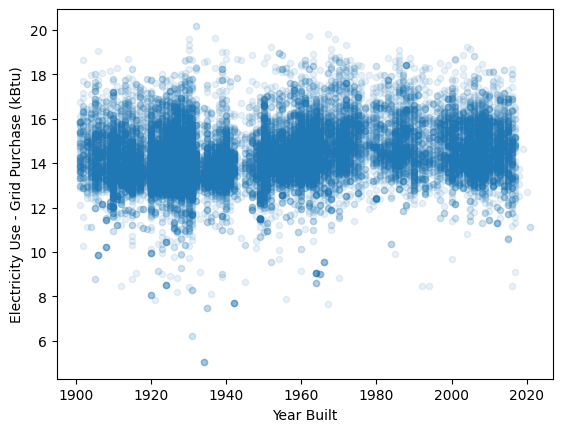

In [16]:
features.plot(year_col, elec_col, kind = "scatter",alpha=0.1)

In [18]:
km = KMeans(n_clusters=7, random_state = 1415, verbose=True)
km.fit(features)

Initialization complete
Iteration 0, inertia 731748.0241464365.
Iteration 1, inertia 651805.4753329152.
Iteration 2, inertia 634526.173620073.
Iteration 3, inertia 628768.4391934496.
Iteration 4, inertia 621813.3835975677.
Iteration 5, inertia 621468.5143774562.
Converged at iteration 5: strict convergence.


KMeans(n_clusters=7, random_state=1415, verbose=True)

In [19]:
km.n_clusters

7

In [21]:
km.cluster_centers_

array([[1920.62634936,   13.86117386],
       [1962.94594595,   14.58488583],
       [2007.05493068,   14.64920044],
       [1944.52709745,   13.96670625],
       [1985.52578731,   14.92978041],
       [1928.73624517,   13.86307175],
       [1908.88350634,   14.16638396]])

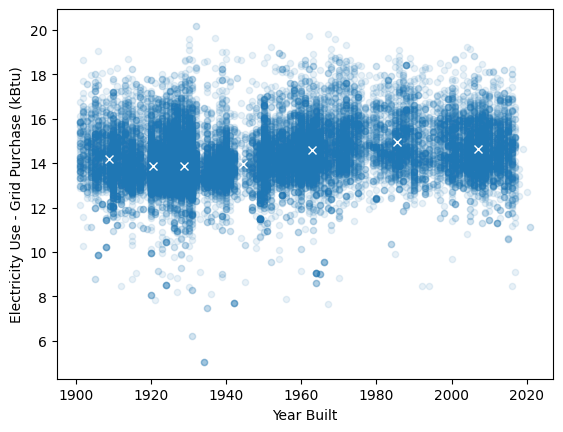

In [22]:
year_col = "Year Built"
elec_col = "Electricity Use - Grid Purchase (kBtu)"
features.plot(year_col, elec_col, kind = "scatter",alpha=0.1)
for i in range(km.n_clusters):
  x= km.cluster_centers_[i,0]
  y = km.cluster_centers_[i,1]
  plt.plot(x,y,"wx")

In [23]:
km.labels_

array([6, 1, 2, ..., 5, 6, 4], dtype=int32)

(1895.0, 2027.0, 4.300626419123616, 20.92425291606683)

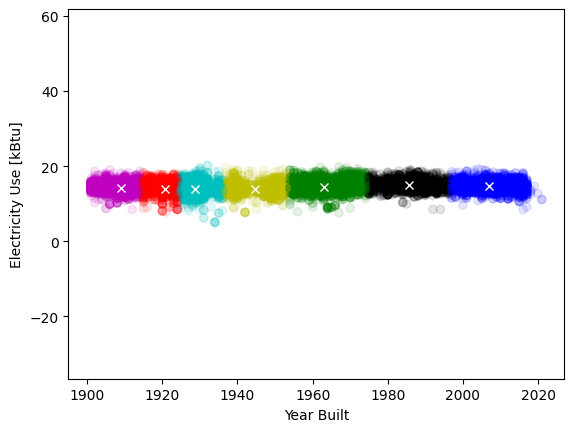

In [27]:
colors = np.array(["r", "g", "b","y", "k","c","m"])
plt.scatter(features[year_col], features[elec_col], color = colors[km.labels_], alpha= 0.1)
for i in range(km.n_clusters):
  x= km.cluster_centers_[i,0]
  y = km.cluster_centers_[i,1]
  plt.plot(x,y,"wx")

plt.xlabel("Year Built")
plt.ylabel("Electricity Use [kBtu]")

plt.axis("equal")

all of the spread is happening along one axis so the cluster centers will spread along the axis. the solution to this is standardization.

In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30256 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              30256 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  30256 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 709.1 KB


In [29]:
features[year_col] = features[year_col].astype(float)

In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30256 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              30256 non-null  float64
 1   Electricity Use - Grid Purchase (kBtu)  30256 non-null  float64
dtypes: float64(2)
memory usage: 709.1 KB


In [31]:
features.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,30256.000000,30256.000000
mean,1948.098262,14.208372
std,30.621603,1.217110
min,1901.000000,5.056246
25%,1925.000000,13.451293
50%,1937.000000,14.036847
75%,1966.000000,14.850849
max,2021.000000,20.168634


In [33]:
features_scaled= preprocessing.scale(features.values, axis=0)

In [34]:
features_scaled

array([[-1.27684064,  1.22161645],
       [ 0.4866494 , -0.72041704],
       [ 1.66230942,  1.38922453],
       ...,
       [-0.72166785, -0.70283123],
       [-1.24418342,  1.27360186],
       [ 0.97650774,  0.57344184]])

In [38]:
features_scaled_df = pd.DataFrame(features_scaled, columns = [year_col,elec_col])


In [39]:
features_scaled_df.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,3.025600e+04,3.025600e+04
mean,5.147771e-16,-8.266494e-16
std,1.000017e+00,1.000017e+00
min,-1.538098e+00,-7.519683e+00
25%,-7.543251e-01,-6.220408e-01
50%,-3.624384e-01,-1.409301e-01
75%,5.846211e-01,5.278800e-01
max,2.380768e+00,4.897144e+00


array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

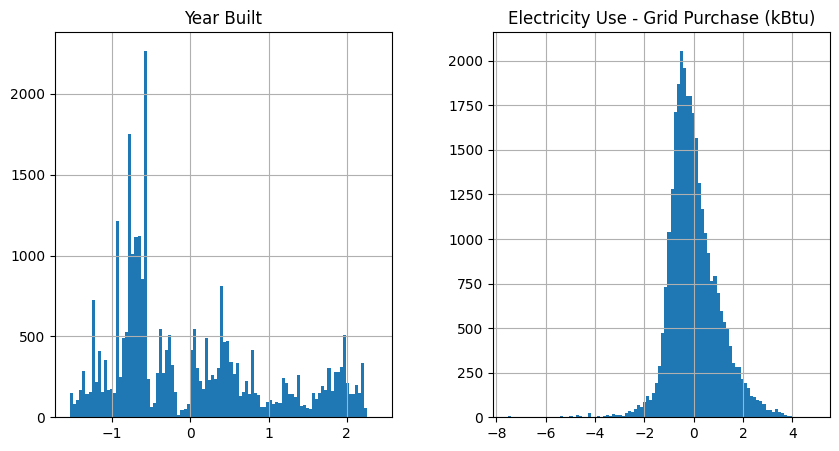

In [40]:
features_scaled_df.hist(figsize=(10,5), bins = 100)

In [42]:
km=KMeans(n_clusters=7, random_state=1415, verbose=True)
km.fit(features_scaled_df)

Initialization complete
Iteration 0, inertia 15941.636451020087.
Iteration 1, inertia 13865.42445607441.
Iteration 2, inertia 13457.171248404296.
Iteration 3, inertia 12898.175673868907.
Iteration 4, inertia 12042.448080191485.
Iteration 5, inertia 11498.371313843714.
Iteration 6, inertia 11264.672632032933.
Iteration 7, inertia 11128.627704235523.
Iteration 8, inertia 11049.989860615353.
Iteration 9, inertia 11014.104095550636.
Iteration 10, inertia 11000.934898409709.
Iteration 11, inertia 10997.689946667157.
Iteration 12, inertia 10996.598903446236.
Iteration 13, inertia 10995.645464890775.
Iteration 14, inertia 10994.163898249682.
Iteration 15, inertia 10993.895648998736.
Converged at iteration 15: center shift 2.4587374778486928e-05 within tolerance 0.00010000000000000373.


KMeans(n_clusters=7, random_state=1415, verbose=True)

Text(0, 0.5, 'Electricity Use [kBtu]')

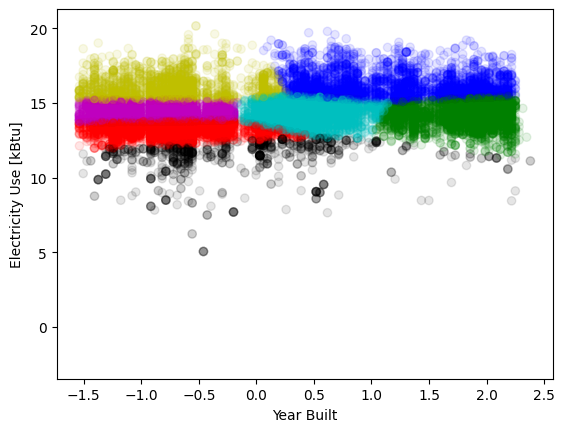

In [44]:
colors = np.array(["r", "g", "b","y", "k","c","m"])
plt.scatter(features_scaled_df[year_col], features[elec_col], color = colors[km.labels_], alpha= 0.1)
for i in range(km.n_clusters):
  x= km.cluster_centers_[i,0]
  y = km.cluster_centers_[i,1]
  plt.plot(x,y,"wx")

plt.xlabel("Year Built")
plt.ylabel("Electricity Use [kBtu]")

we figured out kmeans clustering, how to plot, and how to standardise our data. if we are using kmeans clustering, we have to standardise our data.